# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
df = pd.read_csv('b1abb33c4f.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [33]:
# Categorizando a coluna APGAR5
bins = [-1, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
df['APGAR5_Categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)



In [34]:
# Exibindo as primeiras linhas do DataFrame para verificar o resultado
df[df['APGAR5'] < 8 ].sample(20)

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5_Categoria
20291,1,4001303.0,110020,1,25,1.0,8 a 11 anos,999992.0,1.0,2.0,...,1486867,ATIVO,MUNIC,Nova União,Rondônia,-10.91553,-62.55509,241.0,807.126,asfixia leve
26848,1,2000733.0,120040,1,18,1.0,4 a 7 anos,999992.0,0.0,0.0,...,1497171,ATIVO,MUNIC,Porto Velho,Rondônia,-8.76889,-63.83145,87.0,34096.394,asfixia moderada
7532,1,4001303.0,110020,1,30,1.0,8 a 11 anos,999992.0,1.0,0.0,...,7587,ATIVO,MUNIC,Mirante da Serra,Rondônia,-11.04561,-62.66943,212.0,1191.875,asfixia moderada
14663,1,2494299.0,110002,1,26,1.0,8 a 11 anos,999992.0,1.0,0.0,...,1481199,ATIVO,MUNIC,Cujubim,Rondônia,-9.37819,-62.58717,111.0,3863.943,asfixia leve
13452,1,7218656.0,110149,1,25,5.0,8 a 11 anos,999992.0,2.0,1.0,...,13584,ATIVO,MUNIC,Costa Marques,Rondônia,-12.43601,-64.23165,145.0,4987.177,asfixia leve
20881,1,4001303.0,110020,1,24,NaN,NaN,NaN,2.0,0.0,...,1487466,ATIVO,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998,asfixia leve
12753,1,2808668.0,110032,1,21,5.0,Nenhuma,999991.0,0.0,0.0,...,12883,ATIVO,MUNIC,São Miguel do Guaporé,Rondônia,-11.69949,-62.72006,191.0,7460.219,asfixia grave
15079,1,2494299.0,110002,1,18,2.0,8 a 11 anos,999992.0,0.0,0.0,...,1481616,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571,asfixia grave
5800,1,2496534.0,110018,1,16,1.0,8 a 11 anos,NaN,0.0,0.0,...,5832,ATIVO,MUNIC,Pimenta Bueno,Rondônia,-11.67754,-61.18367,186.0,6240.932,asfixia grave
1121,1,2494299.0,110002,1,20,1.0,8 a 11 anos,999992.0,1.0,1.0,...,1128,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571,asfixia leve


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

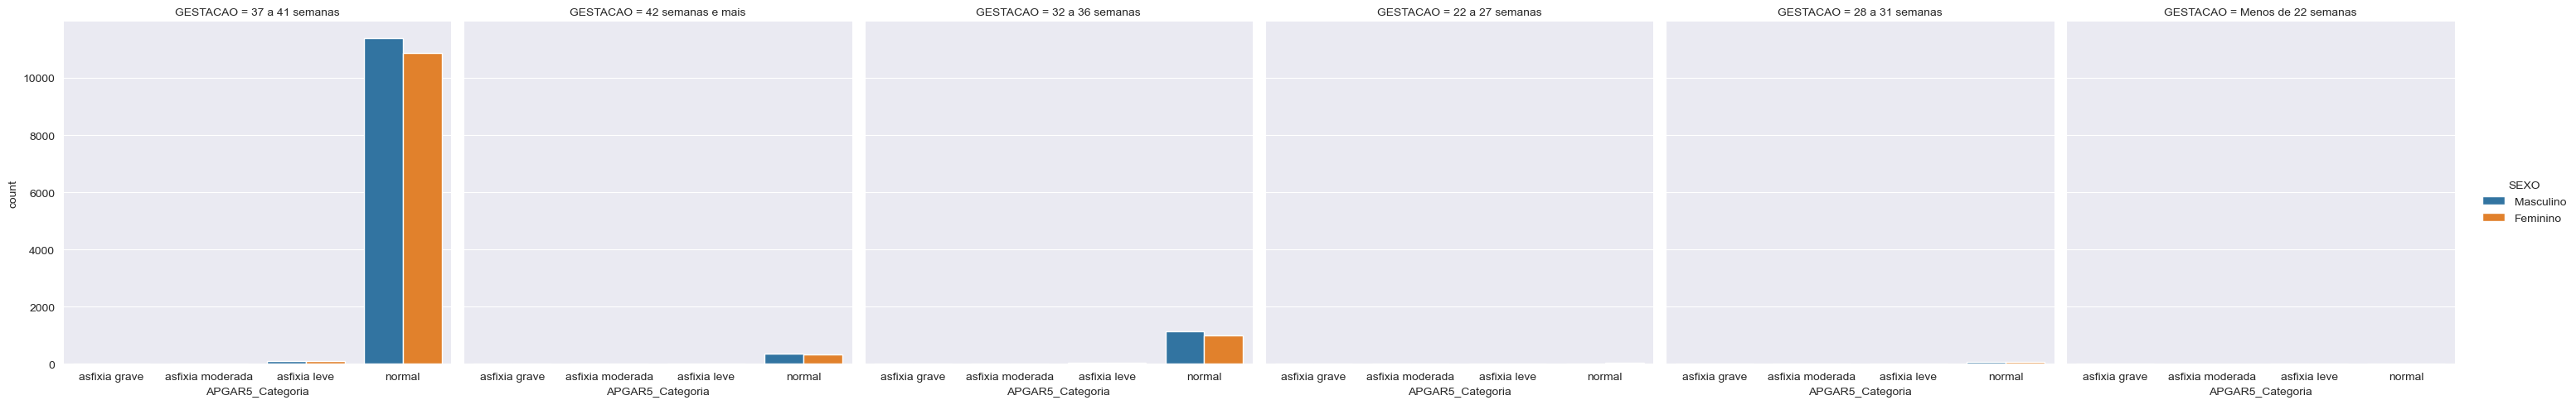

In [35]:
sns.catplot(data=df, x='APGAR5_Categoria', col='GESTACAO', hue='SEXO', kind= 'count')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

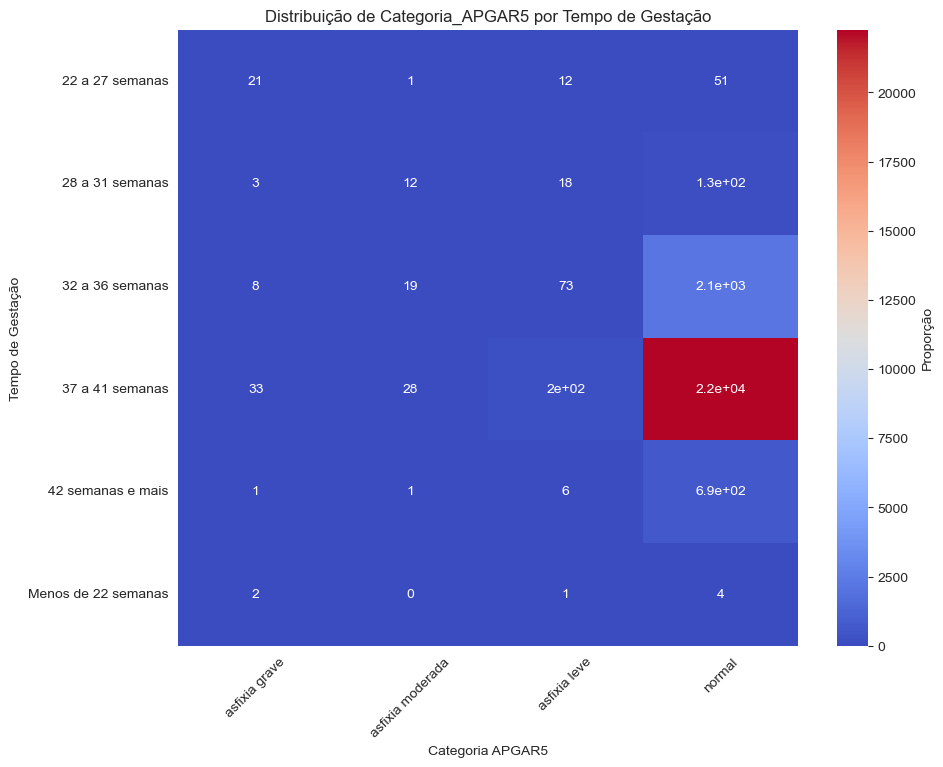

In [41]:
crosstab = pd.crosstab(index = df['GESTACAO'],columns = df['APGAR5_Categoria'])
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap= 'coolwarm', cbar_kws={'label': 'Proporção'})
plt.title('Distribuição de Categoria_APGAR5 por Tempo de Gestação')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Tempo de Gestação')
plt.xticks(rotation=45)
plt.show()

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

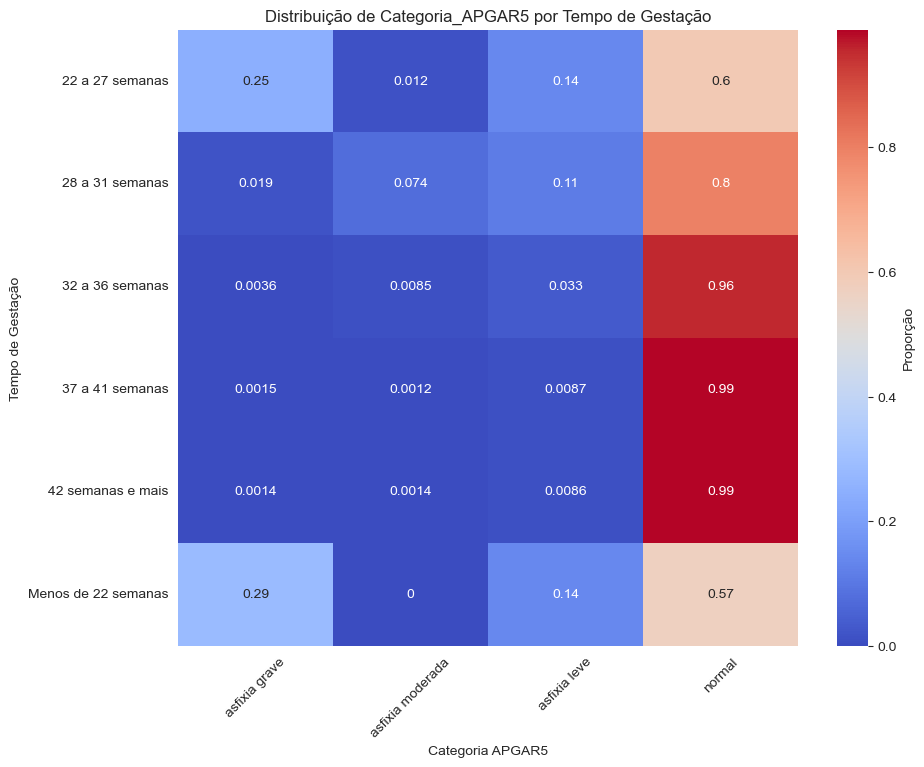

In [42]:
crosstab = pd.crosstab(index = df['GESTACAO'],columns = df['APGAR5_Categoria'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap= 'coolwarm', cbar_kws={'label': 'Proporção'})
plt.title('Distribuição de Categoria_APGAR5 por Tempo de Gestação')
plt.xlabel('Categoria APGAR5')
plt.ylabel('Tempo de Gestação')
plt.xticks(rotation=45)
plt.show()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

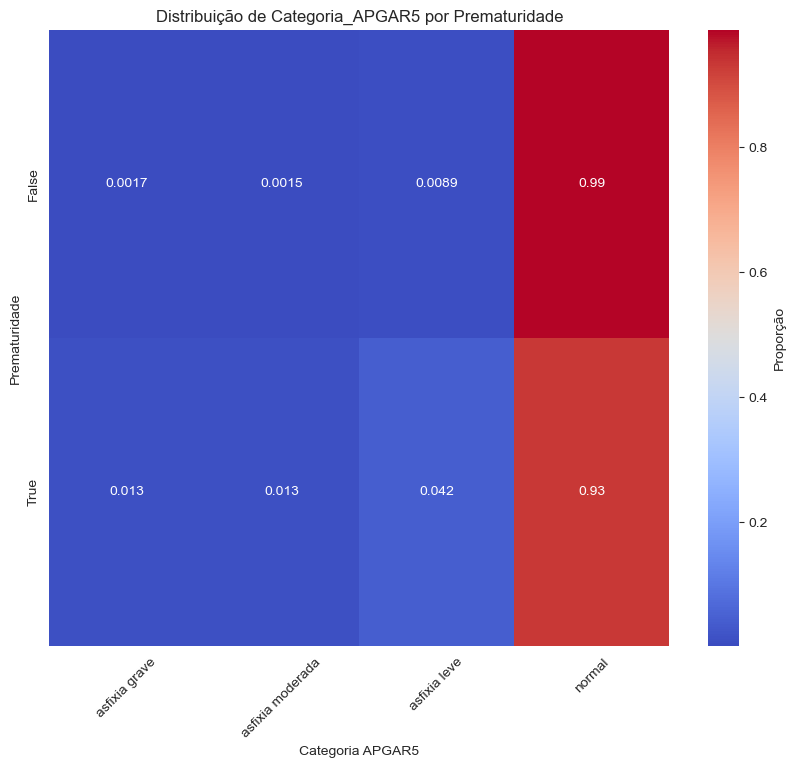

In [44]:
df['PREMATURO'] = df['GESTACAO'].isin(['22 a 27 semanas', '28 a 31 semanas', '32 a 36 semanas'])
crosstab = pd.crosstab(index = df['PREMATURO'],columns = df['APGAR5_Categoria'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap= 'coolwarm', cbar_kws={'label': 'Proporção'})
plt.title('Distribuição de Categoria_APGAR5 por Prematuridade') 
plt.xlabel('Categoria APGAR5')
plt.ylabel('Prematuridade')
plt.xticks(rotation=45)
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [45]:
correlation = df[['APGAR5', 'PESO']].corr()
print(correlation)

         APGAR5     PESO
APGAR5  1.00000  0.16821
PESO    0.16821  1.00000


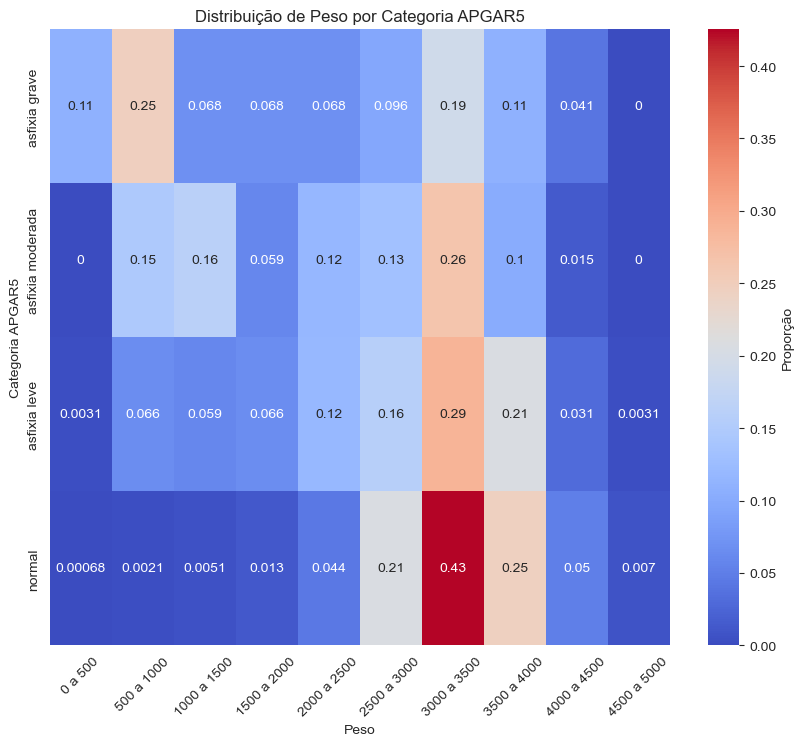

In [49]:
#cateorizando peso em 10 categorias
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
labels = ['0 a 500', '500 a 1000', '1000 a 1500', '1500 a 2000', '2000 a 2500', '2500 a 3000', '3000 a 3500', '3500 a 4000', '4000 a 4500', '4500 a 5000']
df['PESO_Categoria'] = pd.cut(df['PESO'], bins=bins, labels=labels, right=True)


crosstab = pd.crosstab(index = df['APGAR5_Categoria'],columns = df['PESO_Categoria'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab, annot=True, cmap= 'coolwarm', cbar_kws={'label': 'Proporção'})
plt.title('Distribuição de Peso por Categoria APGAR5')
plt.xlabel('Peso')
plt.ylabel('Categoria APGAR5')
plt.xticks(rotation=45)
plt.show()


Podemos observar uma maior proporção de bebês com APGAR5 'asfixia grave' nas categorias de peso mais baixas. Isso corrobora com a literatura médica, que afirma que bebês com baixo peso ao nascer têm maior probabilidade de terem APGAR5 baixo.